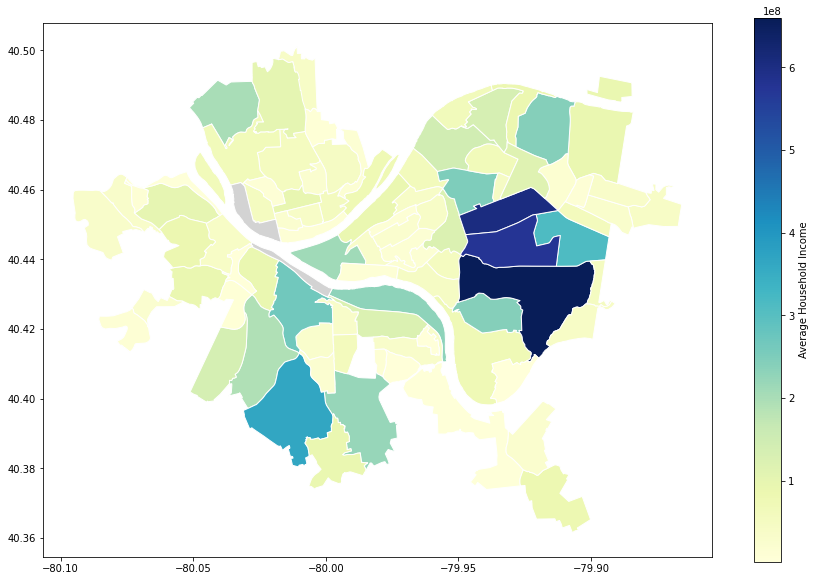

In [81]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
# load data
income = pd.read_csv("aggregatehouseholdincome.csv", index_col="Id") # use the column named _id as the row index

#print(income[income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"]=='-'])

income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = pd.to_numeric(income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"], errors='coerce')
income = income.dropna(subset=["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"])
income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"].astype(int)


#pd.set_option('display.max_rows', income.shape[0]+1)
#income.sort_values(by="Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)")

#income.head(100)

#ADDING THE MAP
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.plot() # plot the geopandas dataframe

incomemap = neighborhoods.merge(income, how='left', left_on='hood', right_on="Neighborhood")
incomemap[['hood',"Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)",'geometry']].head()

incomemap.plot(column="Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)", cmap='YlGnBu', edgecolor='white', legend=True,
             legend_kwds={"label": "Average Household Income"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})